### Dataset usato scaricabile dal seguente link
https://www.kaggle.com/juzershakir/tmdb-movies-dataset

Analisi esplorativa e ricerca di una eventuale correlazione tra le variabili popolarità e budget.

In [4]:
# Importazione librerie
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns       
import numpy as np


In [5]:
# Caricamento dei dati e visualizzazione dell'head
df=pd.read_csv('tmdb_movies_data.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [6]:
# righe e delle colonne di questo set di dati
df.shape


(10866, 21)

In [7]:
# tipi di dati per vedere se ci sono alcuni tipi classificati in modo errato
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [8]:
# controllo univocità valori di ogni colonna
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [9]:
# Valori statistici
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [10]:
# Valori non nulli e l'utilizzo della memoria.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [11]:
# Conteggio valori nulli
df.isnull().sum()


id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [12]:
# Eliminazione colonne non utili (axis=1 - colonne)
df.drop(['id','imdb_id', 'homepage','overview'],axis=1,inplace=True)  

# Riempio i dati mancanti (na) con lo 0 - se vero.
df['cast'].fillna('missing',inplace=True )
df['director'].fillna('missing',inplace=True)
df['tagline'].fillna('missing',inplace=True)
df['keywords'].fillna('missing',inplace=True)
df['genres'].fillna('missing',inplace=True)
df['production_companies'].fillna('missing',inplace=True) 
df['budget'] = df['budget'].replace(0, np.NAN) 
# rimpiazzo lo 0 del budget per il calcolo  df['budget'].median() altrimenti mi crea un artefatto sulla mediana


In [13]:
# Controllo
df.isnull().sum()

popularity                 0
budget                  5696
revenue                    0
original_title             0
cast                       0
director                   0
tagline                    0
keywords                   0
runtime                    0
genres                     0
production_companies       0
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [14]:
# Duplicati ( valore logico 1 se vero )
df.duplicated().sum()


1

In [15]:
# Eliminazione duplicati e conferma
df.drop_duplicates(inplace=True)      
df.duplicated().sum()

0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc276e74d10>,
      dtype=object)

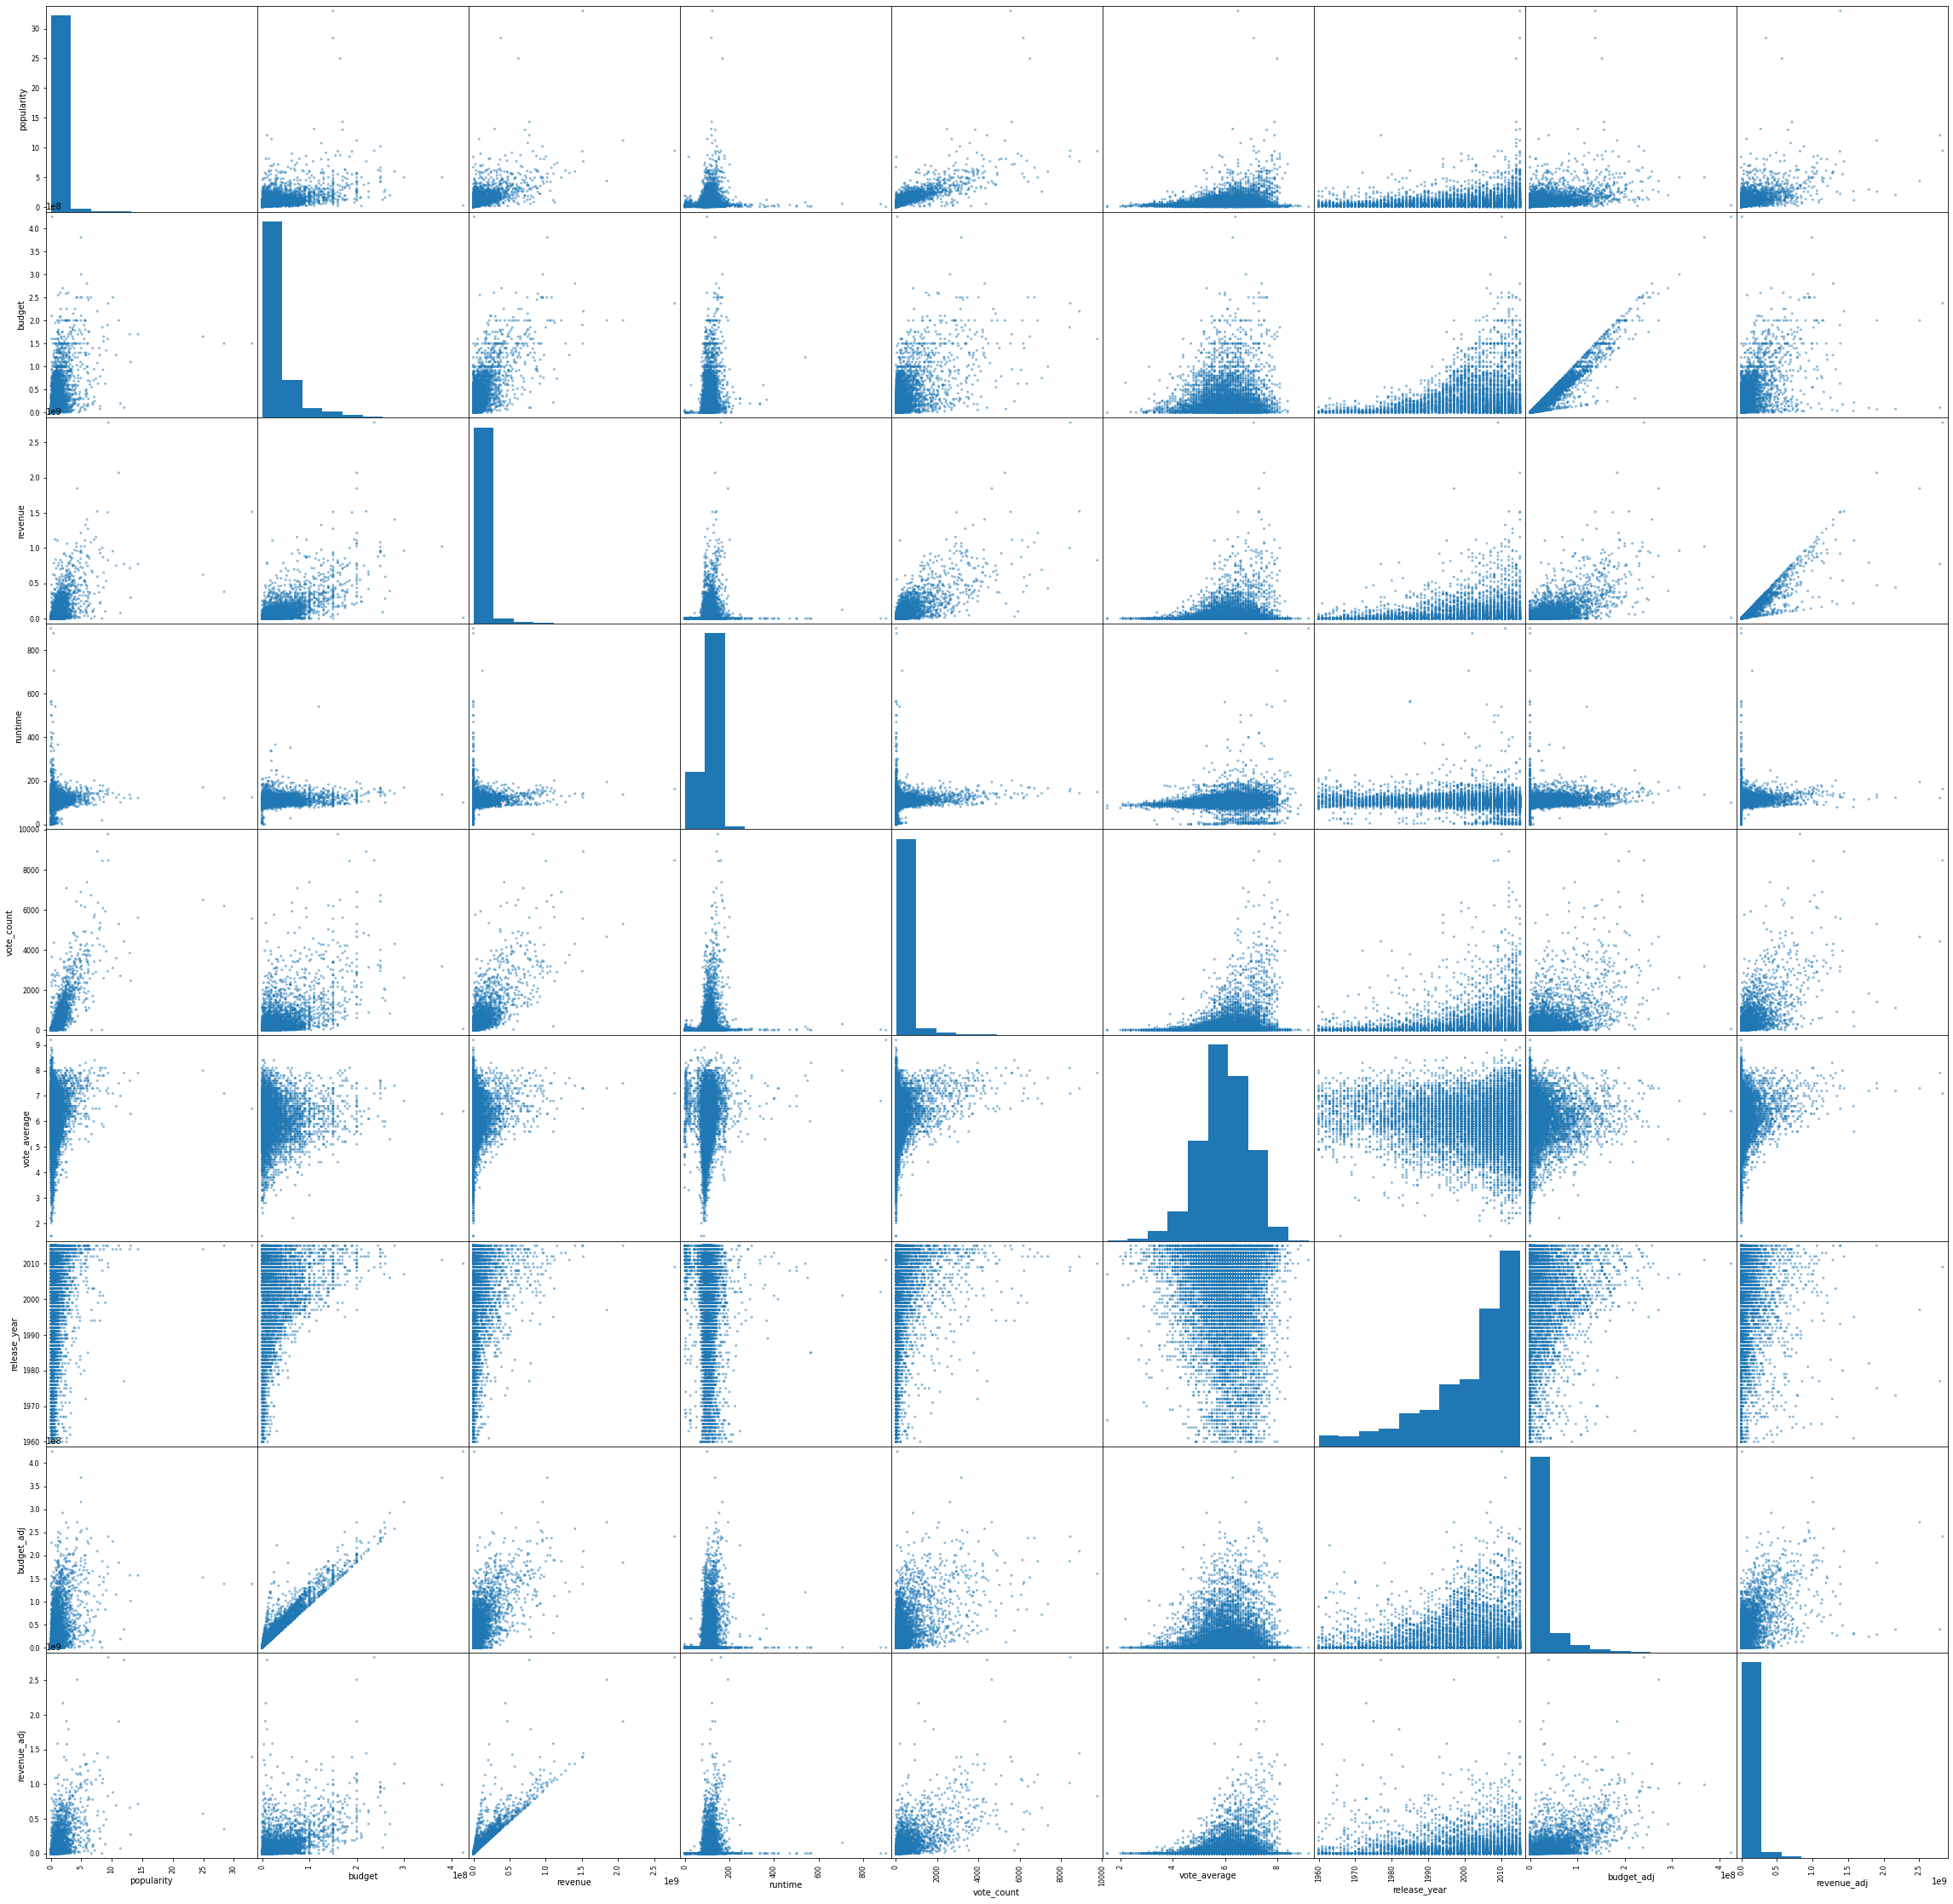

In [16]:
# serve a me come analisi esplorativa
pd.plotting.scatter_matrix(df,figsize=(40,40))
               

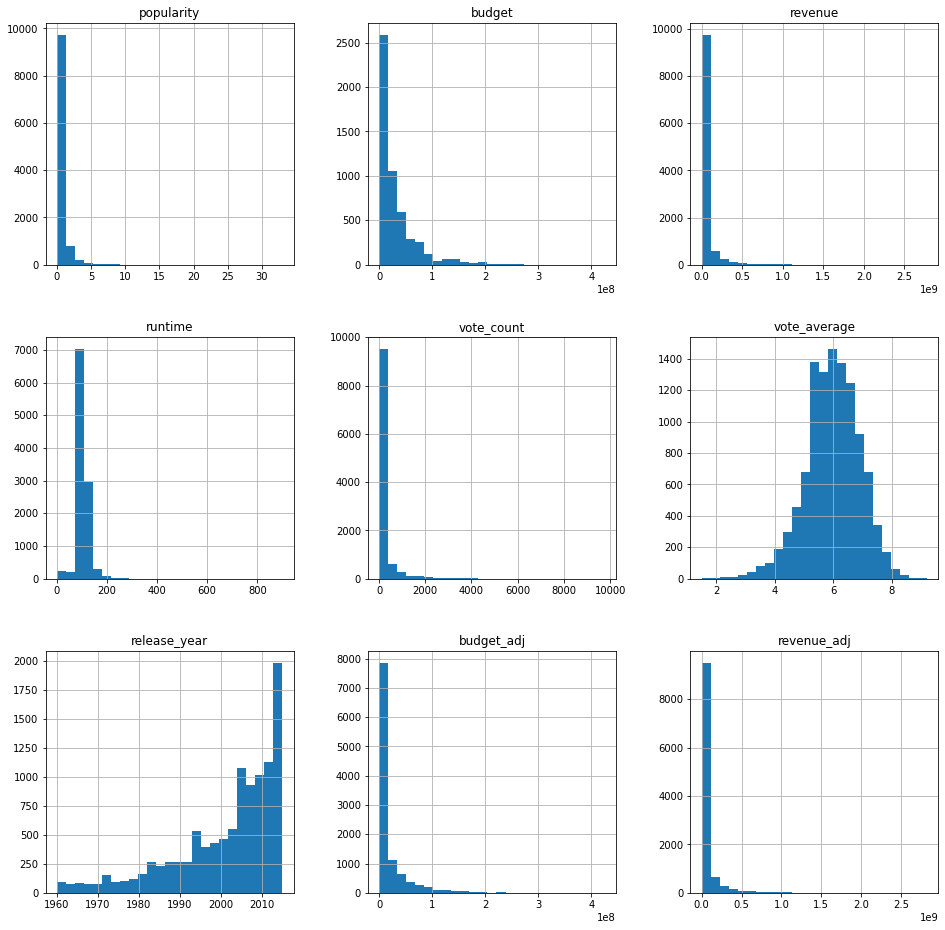

In [17]:
# Numero di film (distribuzione) per ogni variabile divise in blocchi su istogramma ( 1en dove n è un numero - *10^n )
df.hist(figsize=(16,16),bins=25);


Budget elevato vs popolarità



Text(0, 0.5, 'popolarità')

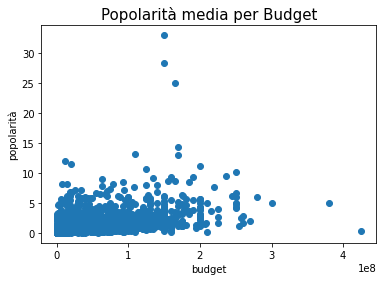

In [18]:
x = df['budget']
y = df['popularity'] 

plt.scatter(x,y)
plt.title('Popolarità media per Budget',fontsize=15)
plt.xlabel('budget',fontsize=10)
plt.ylabel('popolarità',fontsize=10)

Bassa correlazione

In [19]:
# Uso la mediana per dividere il dataset in alto e basso budget ( {}'.format(m) mi serve per creare la stringa per la query inserendo m )
m = df['budget'].median()
l_budg =  df.query('budget < {}'.format(m))
h_budg =  df.query('budget >= {}'.format(m))
print(m)
print(l_budg)
print(h_budg)

17000000.0
       popularity      budget  ...    budget_adj   revenue_adj
12       6.118847  15000000.0  ...  1.379999e+07  3.391985e+07
35       3.557846   6000000.0  ...  5.519998e+06  3.256960e+07
39       3.227329  11000000.0  ...  1.012000e+07  5.711002e+07
45       3.023253  10000000.0  ...  9.199996e+06  1.318708e+07
47       2.968254  12000000.0  ...  1.104000e+07  7.867128e+07
...           ...         ...  ...           ...           ...
10835    0.299911  12000000.0  ...  8.061618e+07  1.343603e+08
10841    0.264925     75000.0  ...  5.038511e+05  0.000000e+00
10848    0.207257   5115000.0  ...  3.436265e+07  8.061618e+07
10855    0.141026    700000.0  ...  4.702610e+06  0.000000e+00
10865    0.035919     19000.0  ...  1.276423e+05  0.000000e+00

[2531 rows x 17 columns]
       popularity       budget  ...    budget_adj   revenue_adj
0       32.985763  150000000.0  ...  1.379999e+08  1.392446e+09
1       28.419936  150000000.0  ...  1.379999e+08  3.481613e+08
2       13.1125

In [20]:
# valori medi di popolarità dei budget basso e alto 
mean_popularity_l_budget = l_budg['popularity'].mean()
mean_popularity_h_budget = h_budg['popularity'].mean()

Text(0, 0.5, 'Popolarità media')

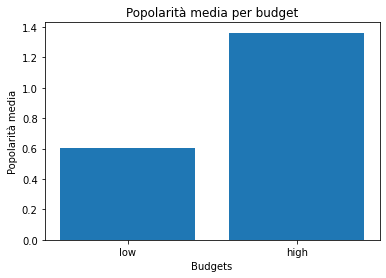

In [21]:
# grafico a barre dei valori medi
locations = [1,2]
heights = [mean_popularity_l_budget , mean_popularity_h_budget]
labels=['low','high']
plt.bar(locations, heights, tick_label = labels)
plt.title('Popolarità media per budget')
plt.xlabel('Budgets')
plt.ylabel('Popolarità media')

In [22]:
# calcolo coefficiente crescita percentuale
coef = (mean_popularity_h_budget - mean_popularity_l_budget) / mean_popularity_h_budget * 100
coef

55.50933772947092

I film ad alto budget hanno maggiori probabilità di avere una maggiore popolarità.

['Avatar', 'Star Wars: The Force Awakens', 'Titanic', 'The Avengers', 'Jurassic World', 'Furious 7', 'Avengers: Age of Ultron', 'Harry Potter and the Deathly Hallows: Part 2', 'Frozen', 'Iron Man 3']


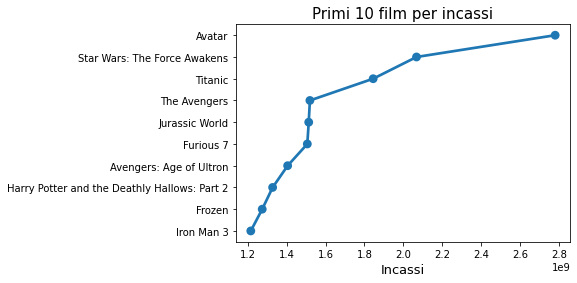

In [23]:
# Primi 10 film con incassi maggiori

# Ordinamento discendente per incassi di tutti i film
info = pd.DataFrame(df['revenue'].sort_values(ascending = False))
info['original_title'] = df['original_title']
data = list(map(str,(info['original_title'])))



# estrazione dei primi 10 film
x = list(data[:10])
y = list(info['revenue'][:10])

print(x)

# ax = sns.pointplot(x,y)
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Primi 10 film per incassi",fontsize = 15)
ax.set_xlabel("Incassi",fontsize = 13)
sns.set_style("darkgrid")

["The Warrior's Way", 'Pirates of the Caribbean: On Stranger Tides', "Pirates of the Caribbean: At World's End", 'Avengers: Age of Ultron', 'Superman Returns', 'John Carter', 'Tangled', 'Spider-Man 3', 'The Lone Ranger', 'X-Men: Days of Future Past']


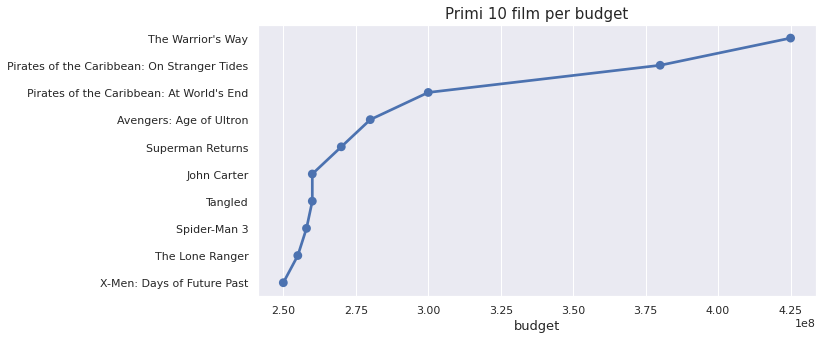

In [24]:
# Primi 10 film con budget maggiori

# Ordinamento discendente per incassi di tutti i film
info = pd.DataFrame(df['budget'].sort_values(ascending = False))
info['original_title'] = df['original_title']
data = list(map(str,(info['original_title'])))



# estrazione dei primi 10 film
x = list(data[:10])
y = list(info['budget'][:10])

print(x)


ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Primi 10 film per budget",fontsize = 15)
ax.set_xlabel("budget",fontsize = 13)
sns.set_style("darkgrid")

Sembrerebbe non esserci correlazione tra budget e incassi almeno sui primi 10 film. 
Si evince che dopo una tendenza sia del budget e degli incassi a mantenersi intorno a un certo valore per gli ultimi film della lista, i primi hanno valori molto discostanti tra loro in termini di budget e incassi.

In [25]:
# Funzione conteggio per categoria 
def extract_data(column_name):
    data = df[column_name].str.cat(sep = '|') 
    # Creazione della serie separata da |
    data = pd.Series(data.split('|'))   
    # conteggio dei valori in ordine decrescente
    count = data.value_counts(ascending = False) 
    return count

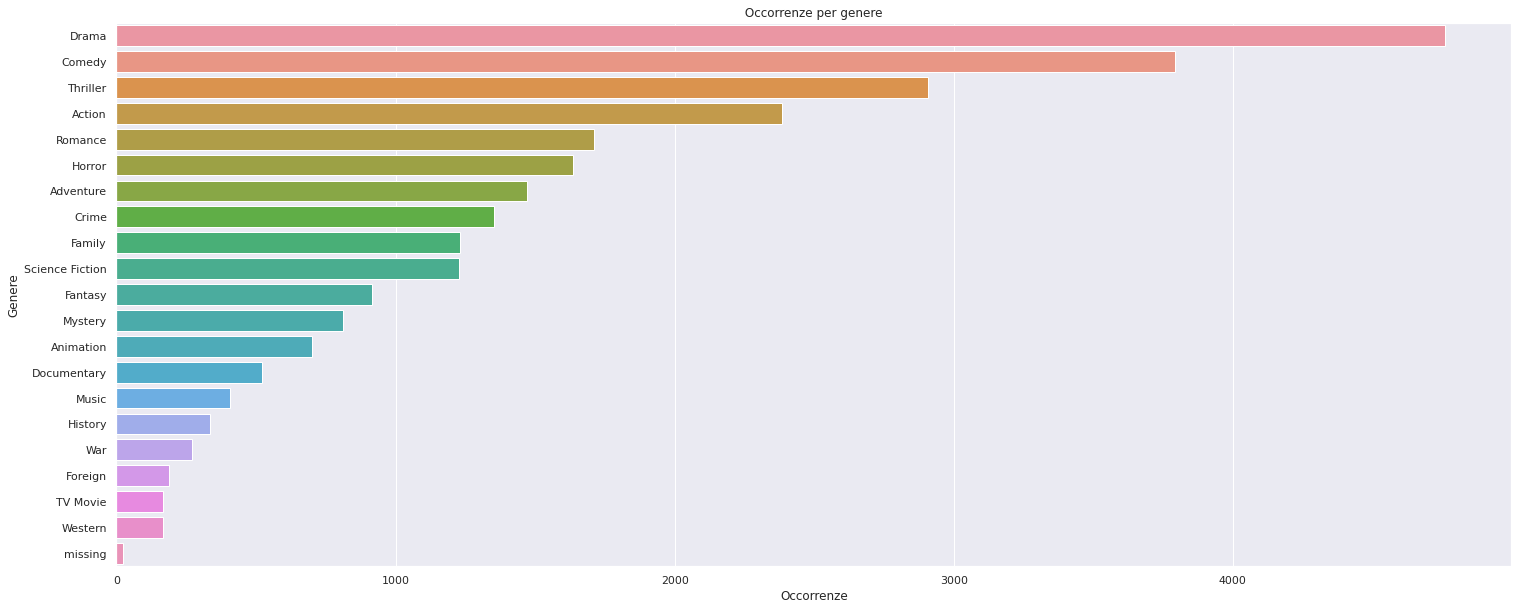

In [26]:
# Genere di film e occorrenza
genre_count = extract_data('genres')

# creazione del dataframe da disegnare
df_genre_counts = pd.DataFrame({'genres': genre_count.index, 'count': genre_count.values }) 


f, ax = plt.subplots(figsize=(25, 10)) #aumento le dimensioni

sns.barplot(x = 'count', y = 'genres', data=df_genre_counts) 
ax.set_title(' Occorrenze per genere ')
ax.set_xlabel('Occorrenze')
ax.set_ylabel('Genere')
plt.show()

In [27]:
count_director = extract_data('director')
count_director

Woody Allen         46
missing             44
Clint Eastwood      34
Martin Scorsese     31
Steven Spielberg    30
                    ..
Ron Nyswaner         1
Eric Kissack         1
Matt Piedmont        1
Leslie Iwerks        1
Simon Hawkins        1
Length: 5363, dtype: int64

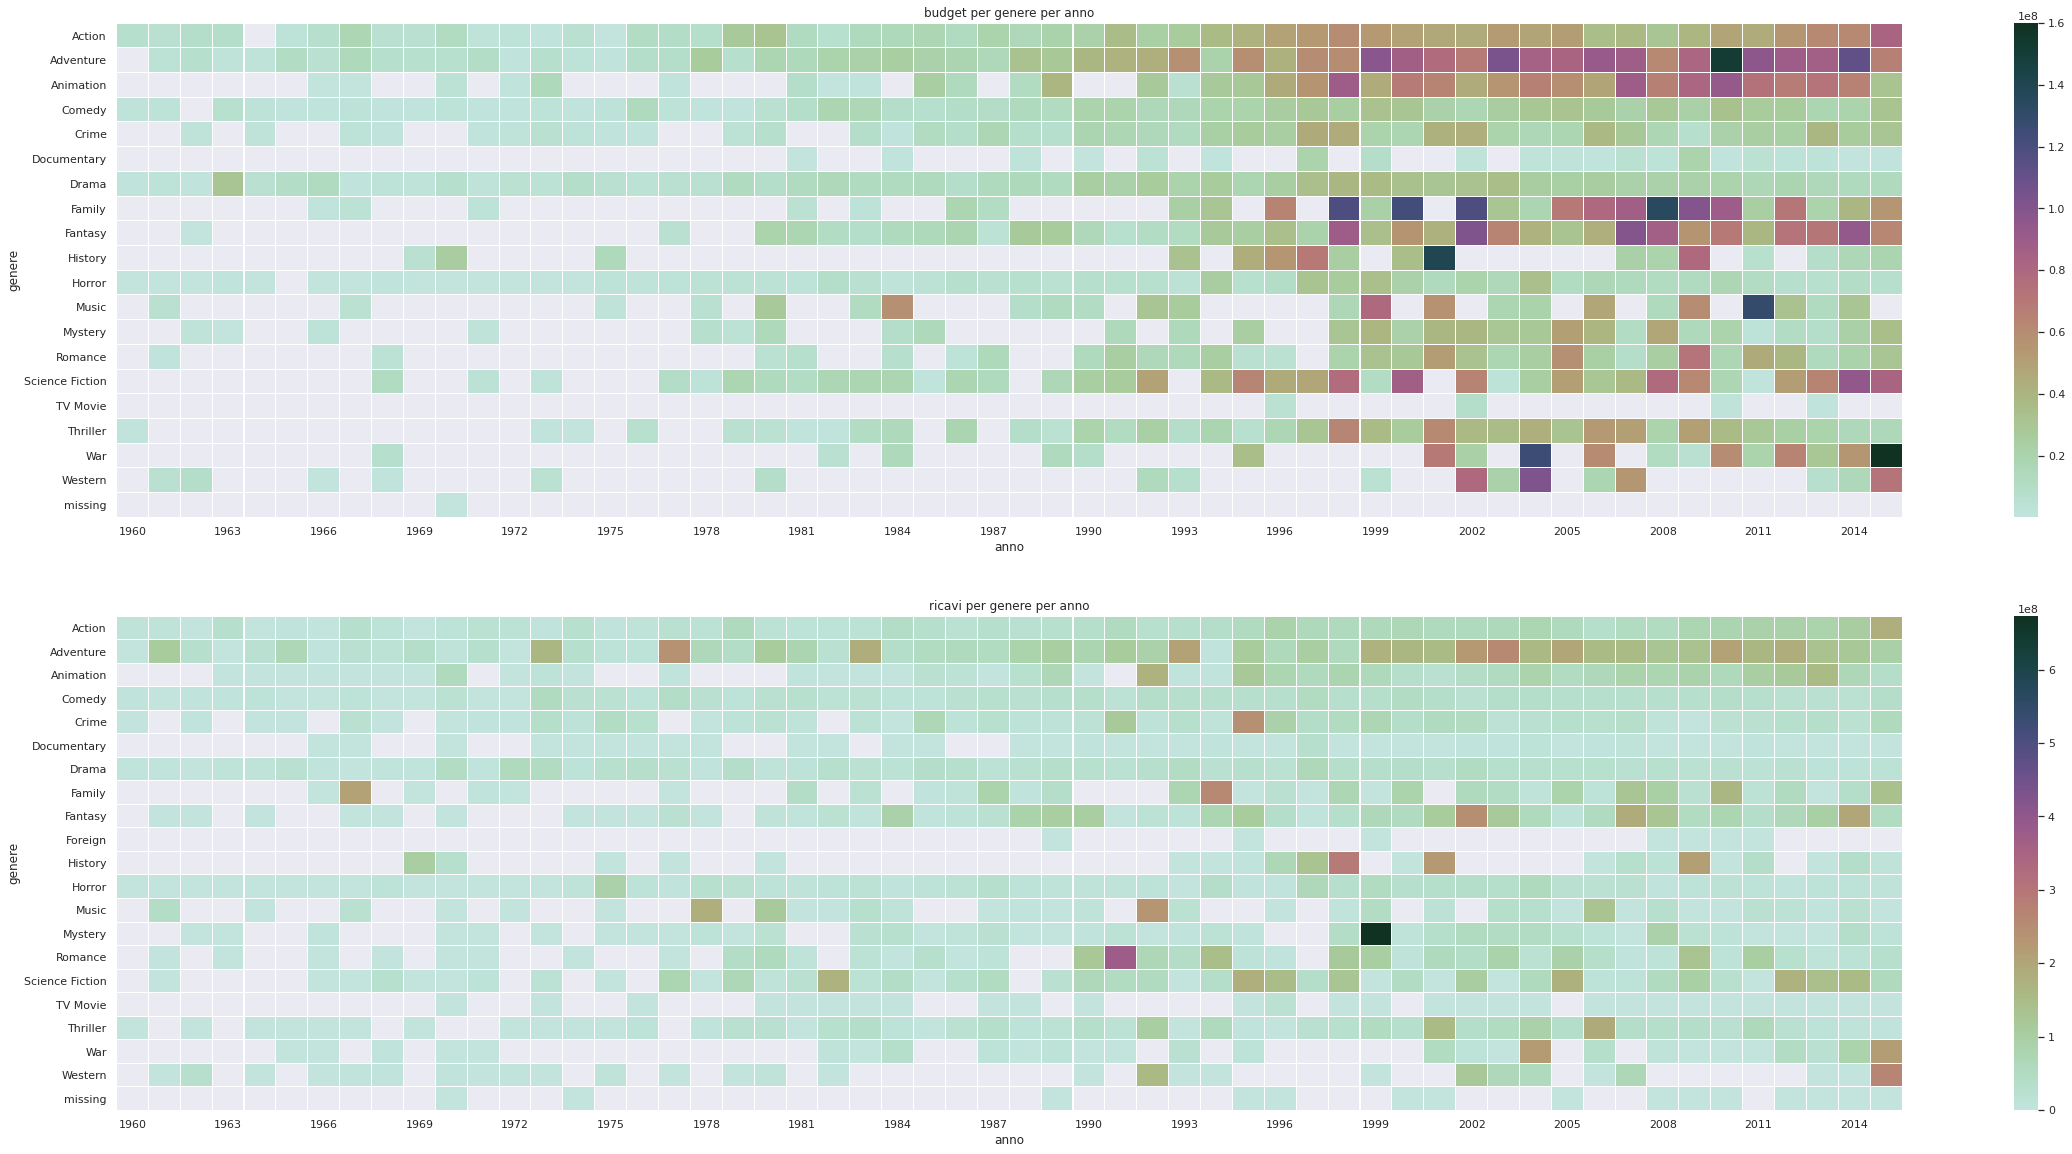

In [28]:
#  Incassi e budget per ogni  genere e anno
df['genre'] =  df['genres'].apply(lambda x: x.split('|')[0])

# genere per  anno con  budget e incassi
genre_year = df.groupby(['genre', 'release_year']).mean().sort_index()
df_gyBudget = genre_year.pivot_table(index=['genre'], columns=['release_year'], values='budget', aggfunc=np.mean)
df_gyBudget = genre_year.pivot_table(index=['genre'], columns=['release_year'], values='budget', aggfunc=np.mean)


df_gyGross = genre_year.pivot_table(index=['genre'], columns=['release_year'], values='revenue', aggfunc=np.mean)
f, [axA, axB] = plt.subplots(figsize=(40, 20), nrows=2)
cmap = sns.cubehelix_palette(start=1.5, rot=1.5, as_cmap=True)
sns.heatmap(df_gyBudget, xticklabels=3, cmap=cmap, linewidths=0.05, ax=axA)
sns.heatmap(df_gyGross, xticklabels=3, cmap=cmap, linewidths=0.05, ax=axB)
axA.set_title('budget per genere per anno')
axA.set_xlabel('anno')
axA.set_ylabel('genere')


axB.set_title('ricavi per genere per anno')
axB.set_xlabel('anno')
axB.set_ylabel('genere')
plt.show()

Spark ( ) controlla ultima versione

In [33]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://downloads.apache.org/spark/spark-2.4.8/spark-2.4.8-bin-hadoop2.7.tgz
!tar xf spark-2.4.8-bin-hadoop2.7.tgz
!pip install -q findspark


In [34]:
import os
import findspark
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.8-bin-hadoop2.7"

findspark.init()

In [35]:
# Inizializzazione Spark

import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Movie').getOrCreate()

In [36]:
revenued = spark.read.option("header", "true").csv("tmdb_movies_data.csv")
revenued.show(5)
# Specifichiamo option("header", "true") 
# in modo che la prima riga del file venga utilizzata per le intestazioni di colonna. 

+------+---------+----------+---------+----------+--------------------+--------------------+--------------------+----------------+--------------------+--------------------+--------------------+-------+--------------------+--------------------+------------+----------+------------+------------+-----------+-----------+
|    id|  imdb_id|popularity|   budget|   revenue|      original_title|                cast|            homepage|        director|             tagline|            keywords|            overview|runtime|              genres|production_companies|release_date|vote_count|vote_average|release_year| budget_adj|revenue_adj|
+------+---------+----------+---------+----------+--------------------+--------------------+--------------------+----------------+--------------------+--------------------+--------------------+-------+--------------------+--------------------+------------+----------+------------+------------+-----------+-----------+
|135397|tt0369610| 32.985763|150000000|1513528

In [37]:
# nomi e i tipi di colonna del DataFrame utilizzando il metodo printSchema(). 
revenued.printSchema()

root
 |-- id: string (nullable = true)
 |-- imdb_id: string (nullable = true)
 |-- popularity: string (nullable = true)
 |-- budget: string (nullable = true)
 |-- revenue: string (nullable = true)
 |-- original_title: string (nullable = true)
 |-- cast: string (nullable = true)
 |-- homepage: string (nullable = true)
 |-- director: string (nullable = true)
 |-- tagline: string (nullable = true)
 |-- keywords: string (nullable = true)
 |-- overview: string (nullable = true)
 |-- runtime: string (nullable = true)
 |-- genres: string (nullable = true)
 |-- production_companies: string (nullable = true)
 |-- release_date: string (nullable = true)
 |-- vote_count: string (nullable = true)
 |-- vote_average: string (nullable = true)
 |-- release_year: string (nullable = true)
 |-- budget_adj: string (nullable = true)
 |-- revenue_adj: string (nullable = true)



In [38]:
# eliminazione colonne non utili
revenued = revenued.drop('id','imdb_id', 'homepage','overview')
revenued.show(5)

+----------+---------+----------+--------------------+--------------------+----------------+--------------------+--------------------+-------+--------------------+--------------------+------------+----------+------------+------------+-----------+-----------+
|popularity|   budget|   revenue|      original_title|                cast|        director|             tagline|            keywords|runtime|              genres|production_companies|release_date|vote_count|vote_average|release_year| budget_adj|revenue_adj|
+----------+---------+----------+--------------------+--------------------+----------------+--------------------+--------------------+-------+--------------------+--------------------+------------+----------+------------+------------+-----------+-----------+
| 32.985763|150000000|1513528810|      Jurassic World|Chris Pratt|Bryce...| Colin Trevorrow|   The park is open.|monster|dna|tyran...|    124|Action|Adventure|...|Universal Studios...|    6/9/2015|      5562|         6.5|  

In [39]:
# cancellazione duplicati
revenued.dropDuplicates()  


DataFrame[popularity: string, budget: string, revenue: string, original_title: string, cast: string, director: string, tagline: string, keywords: string, runtime: string, genres: string, production_companies: string, release_date: string, vote_count: string, vote_average: string, release_year: string, budget_adj: string, revenue_adj: string]

In [40]:
 


revenued.na.fill(value=0,subset=["revenue"]).show()
# rimpiazzo lo 0 nella revenue altrimenti mi crea un artefatto sulla media

+----------+---------+----------+--------------------+--------------------+--------------------+--------------------+--------------------+-------+--------------------+--------------------+------------+----------+------------+------------+-----------+-----------+
|popularity|   budget|   revenue|      original_title|                cast|            director|             tagline|            keywords|runtime|              genres|production_companies|release_date|vote_count|vote_average|release_year| budget_adj|revenue_adj|
+----------+---------+----------+--------------------+--------------------+--------------------+--------------------+--------------------+-------+--------------------+--------------------+------------+----------+------------+------------+-----------+-----------+
| 32.985763|150000000|1513528810|      Jurassic World|Chris Pratt|Bryce...|     Colin Trevorrow|   The park is open.|monster|dna|tyran...|    124|Action|Adventure|...|Universal Studios...|    6/9/2015|      5562

In [41]:
#Film con più alto incasso rispetto alla media degli incassi

from pyspark.sql.functions import *
most_revenued = revenued\
.groupBy("original_title")\
.agg(avg(col("revenue")))\
.withColumnRenamed("avg(revenue)", "top_revenue")\
.sort(desc("top_revenue"))

In [42]:
most_revenued.show()

+--------------------+-------------+
|      original_title|  top_revenue|
+--------------------+-------------+
|              Avatar|2.781505847E9|
|Star Wars: The Fo...|2.068178225E9|
|      Jurassic World| 1.51352881E9|
|           Furious 7| 1.50624936E9|
|Avengers: Age of ...|1.405035767E9|
|Harry Potter and ...|1.327817822E9|
|          Iron Man 3|1.215439994E9|
|             Minions|1.156730962E9|
|Transformers: Dar...|1.123746996E9|
|The Lord of the R...|1.118888979E9|
|             Skyfall|1.108561013E9|
|             The Net|1.106279658E9|
|The Dark Knight R...|1.081041287E9|
|Pirates of the Ca...|1.065659812E9|
|         Toy Story 3|1.063171911E9|
|Pirates of the Ca...|   1.021683E9|
|The Hobbit: An Un...|1.017003568E9|
|     The Dark Knight|1.001921825E9|
|Harry Potter and ...|  9.7647555E8|
|     Despicable Me 2| 9.70761885E8|
+--------------------+-------------+
only showing top 20 rows



In [43]:
# Calculate average and maximum of top_revenue

most_revenued.select([mean('top_revenue'), max('top_revenue')]).show(1)

+-------------------+----------------+
|   avg(top_revenue)|max(top_revenue)|
+-------------------+----------------+
|3.939850164059643E7|   2.781505847E9|
+-------------------+----------------+



In [44]:
# Conclusione

# Questa seconda parte ha mostrato come eseguire alcune semplici attività di manipolazione dei dati
# facendo uso dell' API PySpark e del framework Apache Spark usato nell'ambito del calcolo distribuito.